#Fake News Detection using CNN, RNN, LSTM and Bidirectional LSTMS

---


### Group No: 18

###Team Members: 

# <table>
  <tr>
    <th> Name </th>
    <th> ID No. </th>
    <th> Email ID </th>
  </tr>
  <tr>
    <td> Rohit Aryan (Leader) </td>
    <td> 2020AAPS0293H </td>
    <td> f20200293@hyderabad.bits-pilani.ac.in </td>
  </tr>
  <tr>
    <td> Rushil Shrivastava </td>
    <td> 2020AAPS1408H </td>
    <td> f20201408@hyderabad.bits-pilani.ac.in </td>
  </tr>
  <tr>
    <td>Akshit Aditya </td>
    <td> 2020A1PS2509H </td>
    <td> f20202509@hyderabad.bits-piani.ac.in </td>
  </tr>
 </table>

---

### Search Algorithms used: 
We are using Ensemble Learner models like **CNN**, **Vanilla RNN**, **LSTM** and B**idirectional LSTM** to analyse and compare the results and the accuracy of the models.




---

###Results:

We will be comparing the perforamnce metrics of the models by running the same dataset as well as the same word embeddings on it. The metrics we will be using to compare are Accuracy, Recall, Precision and F1 score. These can be calculated from a tabular representaion called confusion matrix.
<br><br>

Accuracy can representated as percentage of predicitions being correct whether true or false.
<br><br>

> Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$

<br>
Recall represents the percentage of positive classification out of the true class.
<br><br>

> Recall = $\frac{TP}{TP+FN}$

<br>
Whereas Precision represents the number of true positive from all positive observations.
<br><br>

> Precision = $\frac{TP}{TP+FP}$


<br>
F1 score represents the trade off between Recall and Precision. It is harmonic mean of Recall and Precision. It is the best metric to be used for comparision for imbalanced datasets where it takes account for both false positives and the false negatives generated from the models.
<br><br>

> F1-score = $\frac{2*Precision*Recall}{Precision+Recall}$




### Importing Libraries

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [26]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, SimpleRNN, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

In [55]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
!ls "/content/drive/My Drive/News"

Fake.csv  glove.twitter.27B.100d.txt  True.csv


In [57]:
fake_df = pd.read_csv('/content/drive/My Drive/News/Fake.csv')
fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [58]:
real_df = pd.read_csv('/content/drive/My Drive/News/True.csv')
real_df.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [59]:
fake_df.shape


(23481, 4)

In [60]:
real_df.shape

(21417, 4)

### Preprocessing Text

In [61]:
real_df["class"] = 1
fake_df["class"] = 0

In [62]:
real_df["text"] = real_df["title"] + " " + real_df["text"]
fake_df["text"] = fake_df["title"] + " " + fake_df["text"]

In [63]:
real_df = real_df.drop(["subject", "date","title"], axis=1)
fake_df = fake_df.drop(["subject", "date", "title"], axis=1)

In [64]:
real_df.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [65]:
fake_df.head()

,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [66]:
df = real_df.append(fake_df, ignore_index=True)
del real_df, fake_df

In [67]:
df.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [68]:
y = df["class"].values
#Converting X to format acceptable by gensim, removing and punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del df

In [69]:
X[:1]

[['budget',
  'fight',
  'looms',
  'republicans',
  'flip',
  'fiscal',
  'script',
  'washington',
  'reuters',
  'head',
  'conservative',
  'republican',
  'faction',
  'congress',
  'voted',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'pay',
  'tax',
  'cuts',
  'called',
  'fiscal',
  'conservative',
  'sunday',
  'urged',
  'budget',
  'restraint',
  '2018',
  'keeping',
  'sharp',
  'pivot',
  'way',
  'among',
  'republicans',
  'representative',
  'mark',
  'meadows',
  'speaking',
  'cbs',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmakers',
  'bracing',
  'battle',
  'january',
  'return',
  'holidays',
  'wednesday',
  'lawmakers',
  'begin',
  'trying',
  'pass',
  'federal',
  'budget',
  'fight',
  'likely',
  'linked',
  'issues',
  'immigration',
  'policy',
  'even',
  'november',
  'congressional',
  'election',
  'campaigns',
  'approach',
  'republicans',
  'seek',
  'keep',
  'control',
  'congress',
  'p

In [70]:
y[:5]

array([1, 1, 1, 1, 1])

In [71]:
y[-5:]

array([0, 0, 0, 0, 0])

### Vectorization

In [72]:
import gensim

In [73]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method 
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [74]:
#vocab size
len(w2v_model.wv)

122369

In [75]:
w2v_model.wv.most_similar("trump")

[('elect', 0.593523383140564),
 ('cruz', 0.5668910145759583),
 ('rubio', 0.5077772736549377),
 ('ridiculous', 0.4893071949481964),
 ('conway', 0.48847994208335876),
 ('course', 0.4846227765083313),
 ('rumsfeld', 0.48226815462112427),
 ('wjkvlvlgs3mwatch', 0.4746568202972412),
 ('outright', 0.4717700183391571),
 ('obama', 0.4717376232147217)]

In [76]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it to lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [77]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[392, 395, 10520, 56, 5522, 1287, 4849, 33, 13, 315]

In [78]:
#Lets check few word to numerical reprsentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break 

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10


In [79]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [80]:
#all news has 700 words (in numerical form now). If they had less words, they have been padded with 0
# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
X[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [81]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [82]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix 

In [83]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

### LSTM

In [84]:
#Defining Neural Network
model1 = Sequential()
#Non-trainable embeddidng layer
model1.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model1.add(LSTM(units=128))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [85]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          12237000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12,354,377
Trainable params: 117,377
Non-trainable params: 12,237,000
_________________________________________________________________


In [86]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [87]:
model1.fit(X_train, y_train, validation_split=0.3, epochs=3)

Epoch 1/3
737/737 [==============================] - 968s 1s/step - loss: 0.1173 - acc: 0.9575 - val_loss: 0.0540 - val_acc: 0.9859
Epoch 2/3
737/737 [==============================] - 963s 1s/step - loss: 0.0268 - acc: 0.9924 - val_loss: 0.0149 - val_acc: 0.9969
Epoch 3/3
737/737 [==============================] - 941s 1s/step - loss: 0.0151 - acc: 0.9961 - val_loss: 0.0190 - val_acc: 0.9952


In [88]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred_LSTM = (model1.predict(X_test) >= 0.5).astype("int")

351/351 [==============================] - 169s 480ms/step


In [123]:
A1 = accuracy_score(y_test, y_pred_LSTM)
R1 = recall_score(y_test, y_pred_LSTM)
P1 = precision_score(y_test, y_pred_LSTM)
F1 = f1_score(y_test, y_pred_LSTM)

print(A1, R1, P1, F1)

0.5043207126948775 0.47018739352640543 0.4732329967612879 0.47170527914925936


In [90]:
print(classification_report(y_test, y_pred_LSTM))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5949
           1       1.00      0.99      1.00      5276

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [91]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_LSTM)
cm1

array([[5941,    8],
       [  35, 5241]])

Text(95.72222222222221, 0.5, 'Truth')

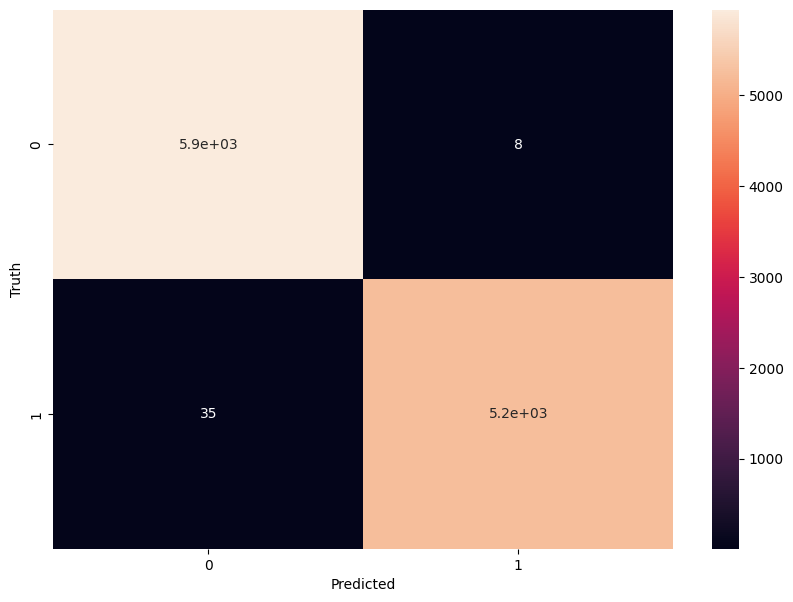

In [92]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

--------------------------------------------------------------------------------

### Bidirectional LSTM

In [94]:
## Creating model Using LSTM
model2=Sequential()
model2.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 100)          12237000  
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 12,398,001
Trainable params: 161,001
Non-trainable params: 12,237,000
_________________________________________________________________
None


In [95]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [96]:
model2.fit(X_train, y_train, validation_split=0.3, epochs=1)

737/737 [==============================] - 949s 1s/step - loss: 0.1332 - acc: 0.9530 - val_loss: 0.0505 - val_acc: 0.9861


In [97]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred_BiLSTM = (model2.predict(X_test) >= 0.5).astype("int")

351/351 [==============================] - 119s 337ms/step


In [98]:
A2 = accuracy_score(y_test, y_pred_BiLSTM)
R2 = recall_score(y_test, y_pred_BiLSTM)
P2 = precision_score(y_test, y_pred_BiLSTM)
F2 = f1_score(y_test, y_pred_BiLSTM)

In [99]:
print(classification_report(y_test, y_pred_BiLSTM))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5775
           1       0.99      0.98      0.98      5450

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [100]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred_BiLSTM)
cm2

array([[5711,   64],
       [ 118, 5332]])

Text(95.72222222222221, 0.5, 'Truth')

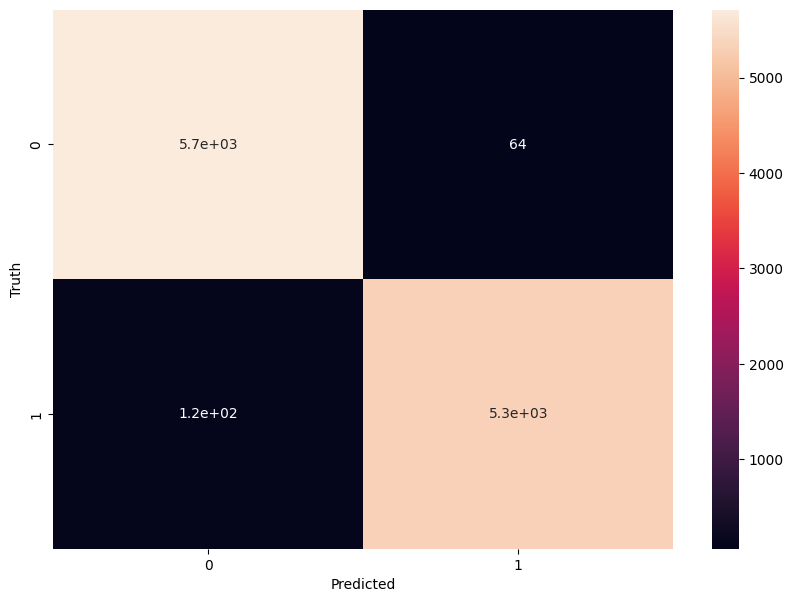

In [101]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

--------------------------------------------------------------------------------

### CNN

In [102]:
model3=Sequential()
model3.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))

model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPool1D())
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPool1D())
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPool1D())
model3.add(Flatten())

model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 700, 100)          12237000  
                                                                 
 conv1d (Conv1D)             (None, 696, 32)           16032     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 348, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 344, 32)           5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 172, 32)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 168, 32)          

In [103]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [104]:
model3.fit(X_train, y_train, validation_split=0.3, epochs=3)

Epoch 1/3
737/737 [==============================] - 103s 138ms/step - loss: 0.1119 - acc: 0.9589 - val_loss: 0.0197 - val_acc: 0.9959
Epoch 2/3
737/737 [==============================] - 93s 127ms/step - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0159 - val_acc: 0.9975
Epoch 3/3
737/737 [==============================] - 94s 127ms/step - loss: 0.0074 - acc: 0.9983 - val_loss: 0.0146 - val_acc: 0.9963


In [105]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred_CNN = (model3.predict(X_test) >= 0.5).astype("int")

351/351 [==============================] - 11s 31ms/step


In [106]:
A3 = accuracy_score(y_test, y_pred_CNN)
R3 = recall_score(y_test, y_pred_CNN)
P3 = precision_score(y_test, y_pred_CNN)
F3 = f1_score(y_test, y_pred_CNN)

In [107]:
print(classification_report(y_test, y_pred_CNN))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5823
           1       1.00      0.99      1.00      5402

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [108]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred_CNN)
cm3

array([[5820,    3],
       [  33, 5369]])

Text(95.72222222222221, 0.5, 'Truth')

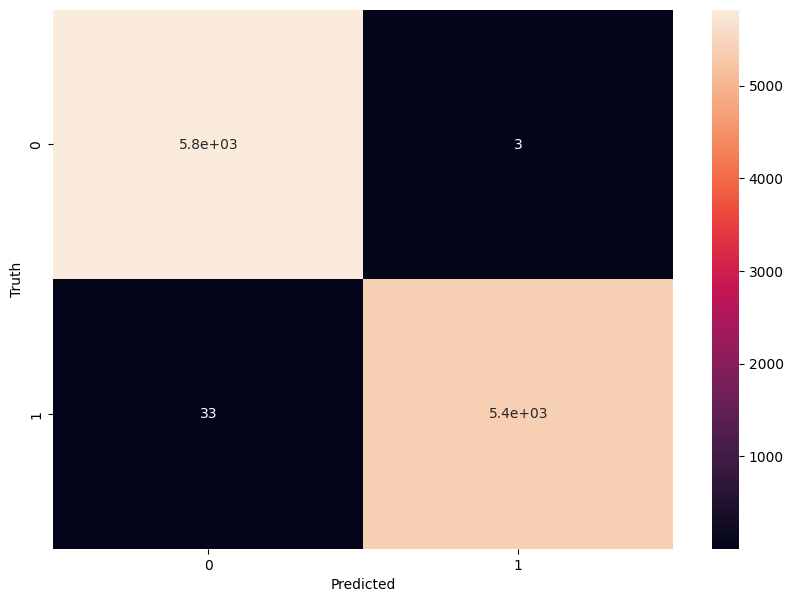

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

--------------------------------------------------------------------------------

### RNN

In [110]:
model4=Sequential()
model4.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))

model4.add(SimpleRNN(256, return_sequences=True))
model4.add(SimpleRNN(128))
model4.add(Dense(1,activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 700, 100)          12237000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 700, 256)          91392     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12,377,801
Trainable params: 140,801
Non-trainable params: 12,237,000
_________________________________________________________________
None


In [111]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [112]:
model4.fit(X_train, y_train, validation_split=0.3, epochs=1)

737/737 [==============================] - 1089s 1s/step - loss: 0.2244 - acc: 0.9153 - val_loss: 0.1719 - val_acc: 0.9242


In [113]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred_RNN = (model4.predict(X_test) >= 0.5).astype("int")

351/351 [==============================] - 141s 401ms/step


In [114]:
A4 = accuracy_score(y_test, y_pred_RNN)
R4 = recall_score(y_test, y_pred_RNN)
P4 = precision_score(y_test, y_pred_RNN)
F4 = f1_score(y_test, y_pred_RNN)

In [115]:
print(classification_report(y_test, y_pred_RNN))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5942
           1       0.92      0.94      0.93      5283

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225



In [116]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred_RNN)
cm4

array([[5489,  453],
       [ 324, 4959]])

Text(95.72222222222221, 0.5, 'Truth')

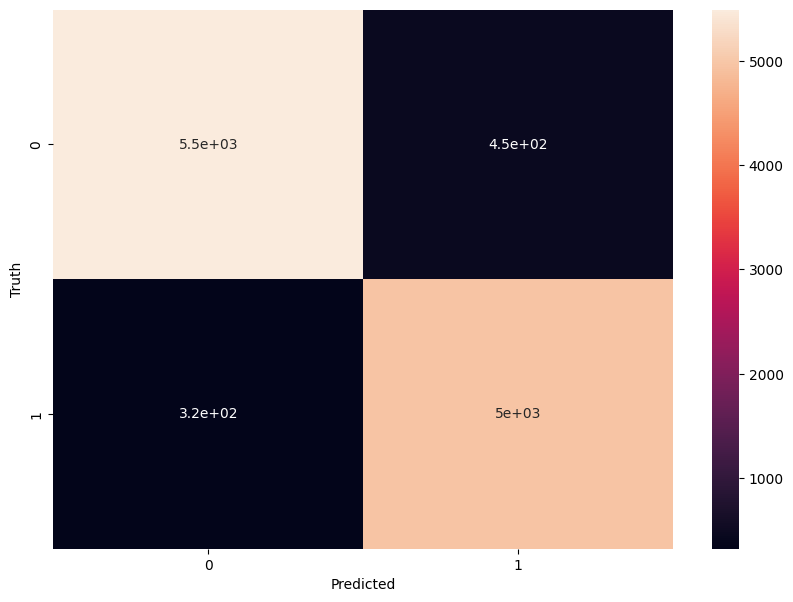

In [117]:
plt.figure(figsize=(10,7))
sns.heatmap(cm4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

--------------------------------------

## Performance Metrics

In [118]:
models = ['LSTM', 'Bi-directional LSTM', 'CNN', 'Vanilla RNN']

### Accuracy:

[0.9961692650334075, 0.9837861915367483, 0.996792873051225, 0.9307795100222717]


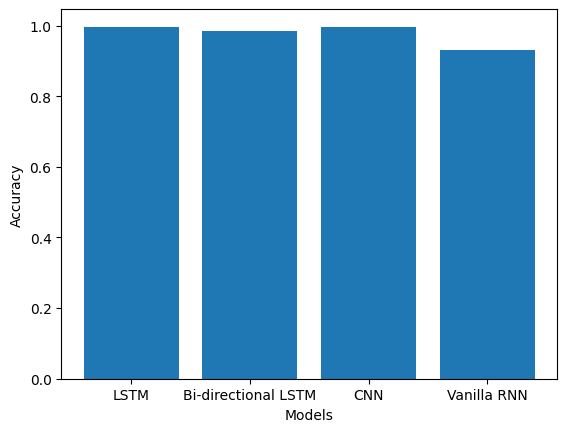

In [119]:
acc_array = [A1, A2, A3, A4]
print(acc_array)

plt.bar(models, acc_array)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

###Recall


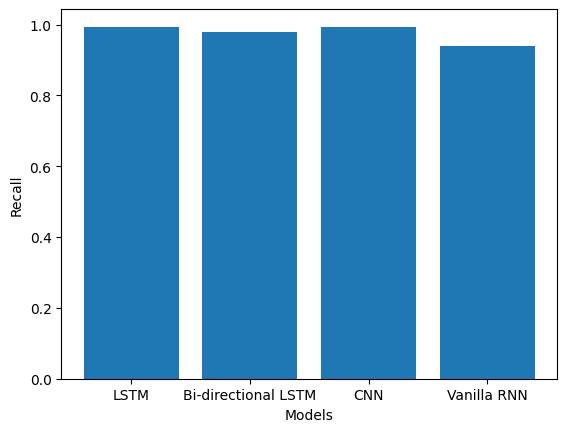

In [120]:
recall_array = [R1, R2, R3, R4]

plt.bar(models, recall_array)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

###Precision

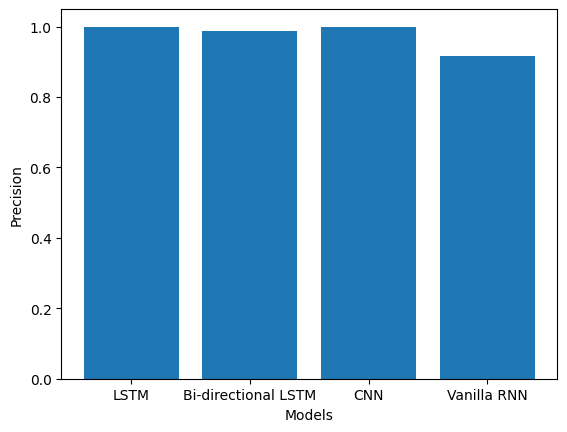

In [121]:
prec_array = [P1, P2, P3, P4]

plt.bar(models, prec_array)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

###F1 Score

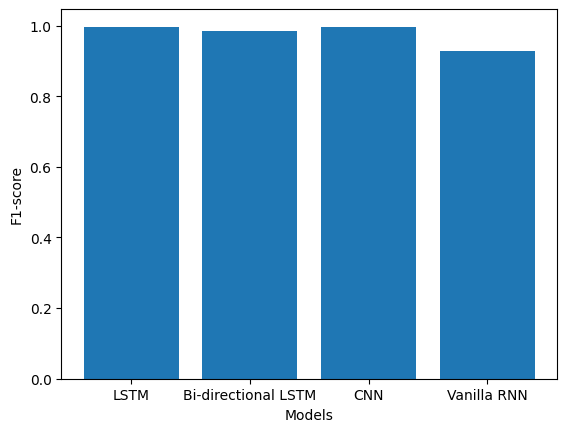

In [122]:
f1_array = [F1, F2, F3, F4]

plt.bar(models, f1_array)
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.show()